<a href="https://colab.research.google.com/github/Tecindes/TelecomX_LATAM/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#üìå Extracci√≥n

In [103]:
import requests

url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json"
respuesta = requests.get(url)

if respuesta.status_code == 200:
    dataURL = respuesta.json()
    print(f'Tipo devuelto de la solicitud HTTP GET : {type(dataURL)}')
else:
    print("Error en la conexi√≥n")

Tipo devuelto de la solicitud HTTP GET : <class 'list'>


In [104]:
_cantidadRegistros=len(dataURL)
print(f'Cantida de registros: {_cantidadRegistros} de la list dataURL')


tipos = set(type(elem) for elem in dataURL)
print(f'\nTipo de datos de los elementos de la lista dataURl:\n ',tipos)



Cantida de registros: 7267 de la list dataURL

Tipo de datos de los elementos de la lista dataURl:
  {<class 'dict'>}


#üîß Transformaci√≥n

In [105]:
import pandas as pd
print('Convertimos dataURL en un data frame:\n')
df = pd.DataFrame(dataURL)

print('Verificamos que no tenga columnas anidadas:')
for col in df.columns:
    if df[col].apply(lambda x: isinstance(x, (list, dict))).any():
        print(f"Columna anidada: {col}")

df.head(2)

Convertimos dataURL en un data frame:

Verificamos que no tenga columnas anidadas:
Columna anidada: customer
Columna anidada: phone
Columna anidada: internet
Columna anidada: account


customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   

                                            internet  \
0  {'InternetService': 'DSL', 'OnlineSecurity': '...   
1  {'InternetService': 'DSL', 'OnlineSecurity': '...   

                                             account  
0  {'Contract': 'One year', 'PaperlessBilling': '...  
1  {'Contract': 'Month-to-month', 'PaperlessBilli...

In [106]:
import pandas as pd
print(f'El datafrane contiene columnas anidades es mas conveniente normalizamos la list dataURL\n')
df_telecom = pd.json_normalize(dataURL)

print(f'Mostramos los primeros 2 registros del dataframa df_telecom')
df_telecom.head(2)




El datafrane contiene columnas anidades es mas conveniente normalizamos la list dataURL

Mostramos los primeros 2 registros del dataframa df_telecom


customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   

  internet.InternetService  ... internet.OnlineBackup  \
0                      DSL  ...                   Yes   
1                      DSL  ...                    No   

  internet.DeviceProtection internet.TechSupport internet.StreamingTV  \
0                        No                  Yes                  Yes   
1                        No                   No                   No   

  internet.StreamingMovies account.Contract account.PaperlessBilling  \
0                       No         One year                      Yes   
1                      Yes   Month-to-month                       No   

  account.PaymentMethod account.Charges.Monthly  account.Charges.Total  
0          Mailed check                    65.6                  593.3  
1          Mailed check                    59.9                  542.4  

[2 rows x 21 columns]

In [107]:

print (f'N√∫mero de registros del data frame: ',df_telecom.shape[0])
print (f'\nN√∫mero registros de churn agrupados por su valor:\n',df_telecom['Churn'].value_counts())

N√∫mero de registros del data frame:  7267

N√∫mero registros de churn agrupados por su valor:
 Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64


In [108]:
print(f'\nEliminamos los registros con data errada el campo Churn\n')
df_telecom.drop(df_telecom[~df_telecom['Churn'].isin(['No', 'Yes'])].index, inplace=True)


print (f'N√∫mero de registros del data frame: ',df_telecom.shape[0])
print (f'\nN√∫mero registros de churn agrupados por su valor:\n',df_telecom['Churn'].value_counts())


Eliminamos los registros con data errada el campo Churn

N√∫mero de registros del data frame:  7043

N√∫mero registros de churn agrupados por su valor:
 Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [109]:
print('Agrupamos los valores de la columna "Churn", que es la que determina si un cliente dejo o no la empresa:\n',df_telecom['Churn'].value_counts())

print('\nCreamos un nuevo data frame con solo datos de los exclientes, para una an√°lisis posterior')
df_telecom_exclientes=df_telecom[df_telecom['Churn'] == 'Yes']
print('Registros en df_telecom_exclientes:',len(df_telecom_exclientes))

Agrupamos los valores de la columna "Churn", que es la que determina si un cliente dejo o no la empresa:
 Churn
No     5174
Yes    1869
Name: count, dtype: int64

Creamos un nuevo data frame con solo datos de los exclientes, para una an√°lisis posterior
Registros en df_telecom_exclientes: 1869


In [110]:

print(f'Cantidad de registros con datos no n√∫mericos en account.Charges.Total:',
      len(df_telecom[pd.to_numeric(df_telecom['account.Charges.Total'], errors='coerce').isna()]))

Cantidad de registros con datos no n√∫mericos en account.Charges.Total: 11


In [111]:
print('Asignamos valor 0 a todos los registros con valor no n√∫merico en account.Charges.Total')
df_telecom['account.Charges.Total'] = pd.to_numeric(
                                                    df_telecom['account.Charges.Total'], errors='coerce'
                                                    ).fillna(0)
print(f'\nVerificamos que ya no existan datos no n√∫mericos en account.Charges.Total:',
      df_telecom[pd.to_numeric(df_telecom['account.Charges.Total'], errors='coerce').isna()].shape[0])

Asignamos valor 0 a todos los registros con valor no n√∫merico en account.Charges.Total

Verificamos que ya no existan datos no n√∫mericos en account.Charges.Total: 0


In [112]:
print('Cantidad clientes que tuvieron 0 meses de contrato campo "tenure":',len(df_telecom[df_telecom['customer.tenure'].isin([0])]))
print('Concuerda con los clientes que no registraban gastos, los mantendremos')

Cantidad clientes que tuvieron 0 meses de contrato campo "tenure": 11
Concuerda con los clientes que no registraban gastos, los mantendremos


In [113]:
print("Valores nulos:\n", df_telecom.isnull().sum())

Valores nulos:
 customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


In [114]:
print('Verificamos tipos de datos del dataframe:\n')
df_telecom.info()
print('\nConclusiones:\n-customer.SeniorCitizen : Es tipo categor√≠a no n√∫merico (campo boolean que representa No, Yes)')

Verificamos tipos de datos del dataframe:

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.T

#üìä Carga y an√°lisis

### An√°lisis exploratorio

In [115]:
print('An√°lisis univariado')
churn_counts = df_telecom['Churn'].value_counts(normalize=True)
print("\nDistribuci√≥n de Churn:\n", churn_counts)


An√°lisis univariado

Distribuci√≥n de Churn:
 Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


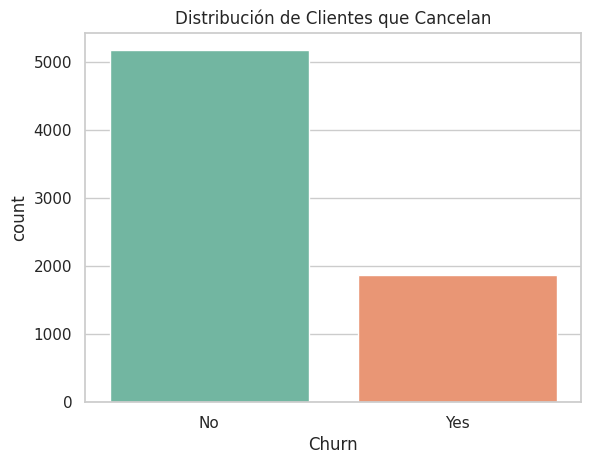

In [116]:
sns.countplot(x='Churn', hue='Churn', data=df_telecom, palette='Set2', legend=False)
plt.title('Distribuci√≥n de Clientes que Cancelan')
plt.show()

An√°lisis Bivariado\Categor√≠as vs Churn


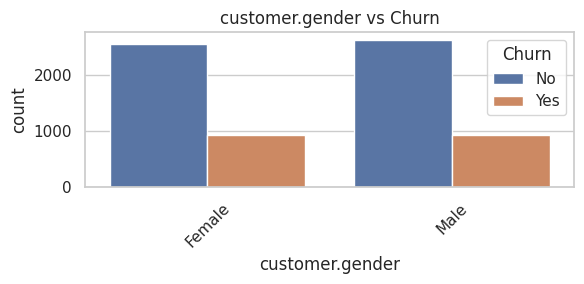

____________________________________________________________________________________________________




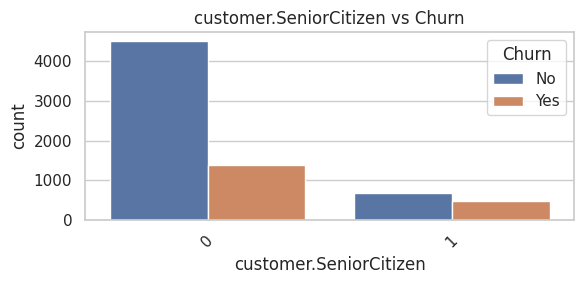

____________________________________________________________________________________________________




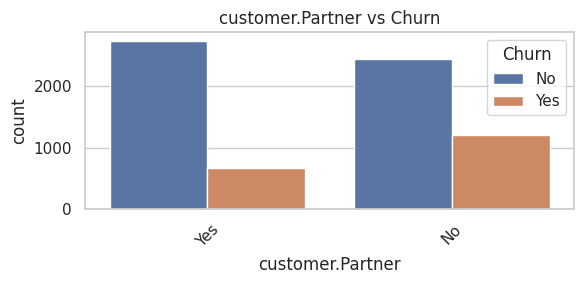

____________________________________________________________________________________________________




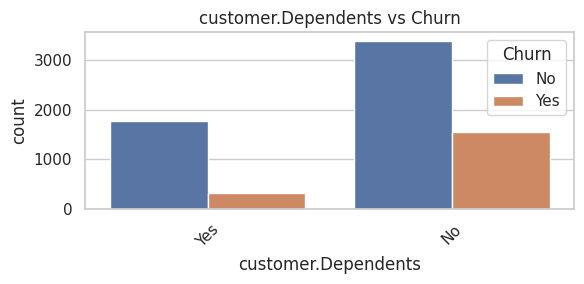

____________________________________________________________________________________________________




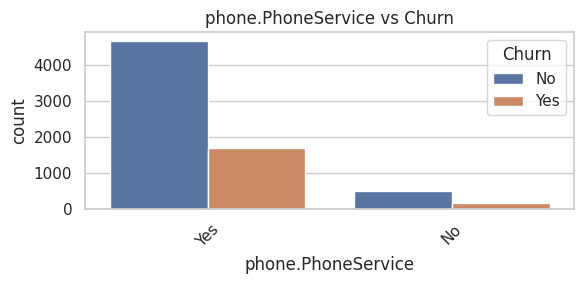

____________________________________________________________________________________________________




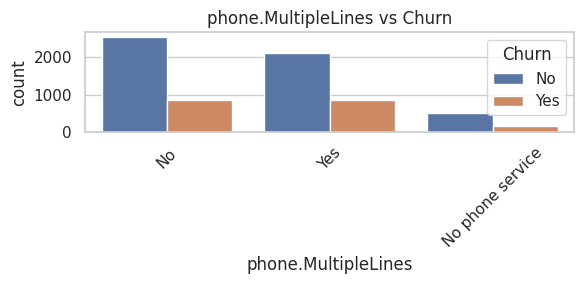

____________________________________________________________________________________________________




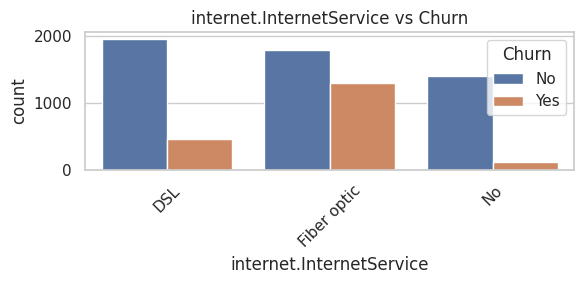

____________________________________________________________________________________________________




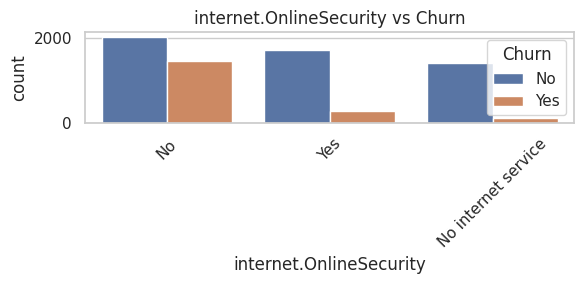

____________________________________________________________________________________________________




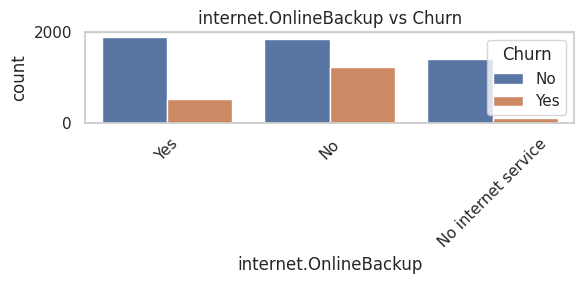

____________________________________________________________________________________________________




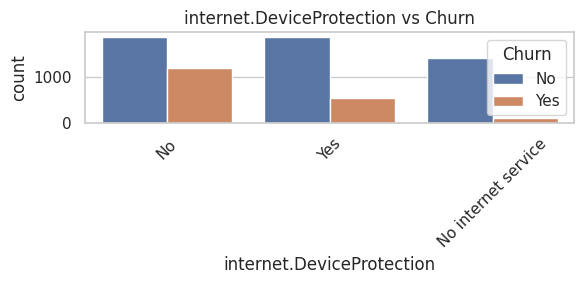

____________________________________________________________________________________________________




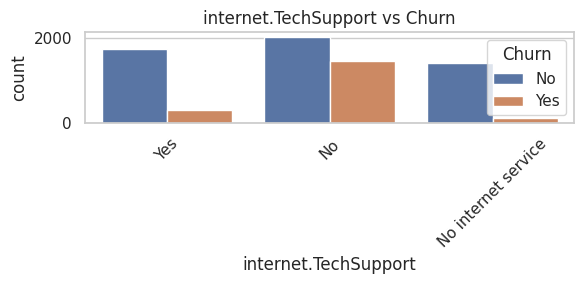

____________________________________________________________________________________________________




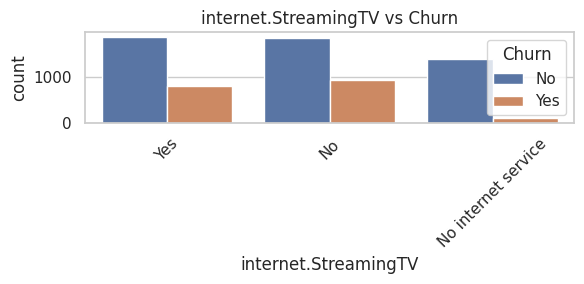

____________________________________________________________________________________________________




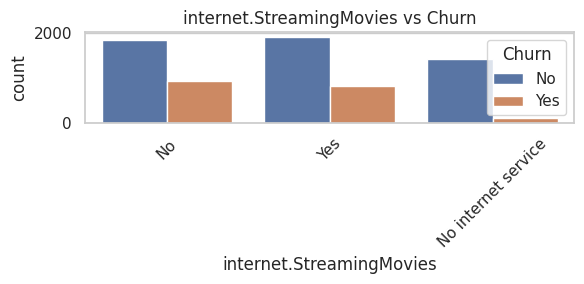

____________________________________________________________________________________________________




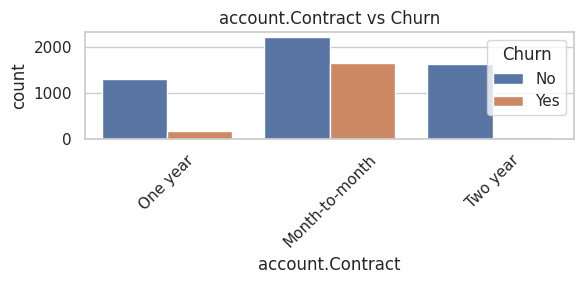

____________________________________________________________________________________________________




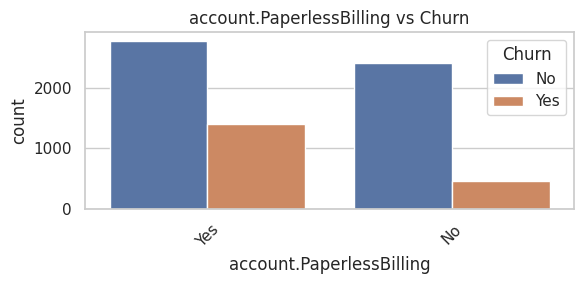

____________________________________________________________________________________________________




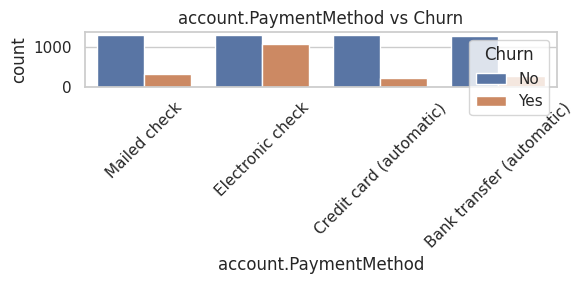

____________________________________________________________________________________________________




In [117]:
#from matplotlib.backends.backend_pdf import PdfPages
#pdf_path = "/content/drive/MyDrive/grafica.pdf"
categorical_cols = ['customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents',
                    'phone.PhoneService', 'phone.MultipleLines',
                    'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
                    'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies',
                    'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod']

print('An√°lisis Bivariado\Categor√≠as vs Churn')
#with PdfPages(pdf_path) as pdf:
for col in categorical_cols:
    plt.figure(figsize=(6,3))
    sns.countplot(x=col, hue='Churn', data=df_telecom)
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=45)
    plt.tight_layout()
    #pdf.savefig()  # Guarda la figura en el PDF
    plt.show()
    plt.close()  # Cierra la figura
    print("_" * 100)
    print('\n')




An√°lisis Bivariado
N√∫mericas vs Churn


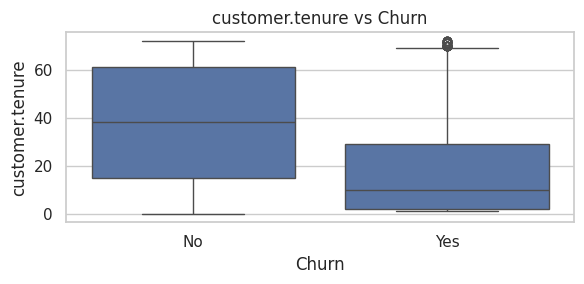

____________________________________________________________________________________________________




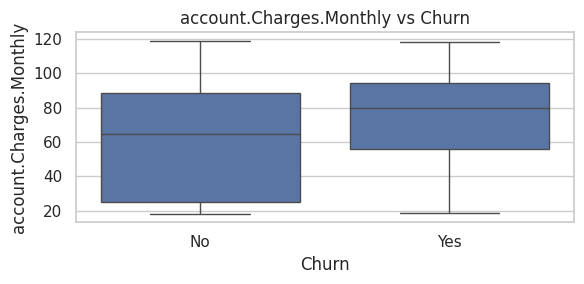

____________________________________________________________________________________________________




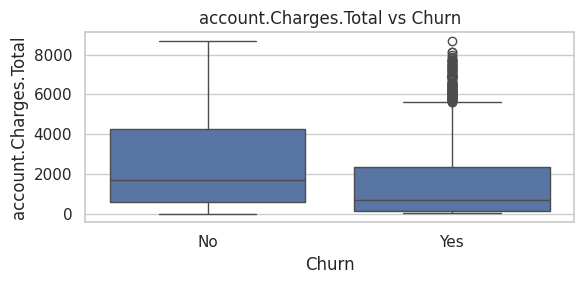

____________________________________________________________________________________________________




In [118]:
numerical_cols = ['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']
print('An√°lisis Bivariado\nN√∫mericas vs Churn')
for col in numerical_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x='Churn', y=col, data=df_telecom)
    plt.title(f'{col} vs Churn')
    plt.tight_layout()
    plt.show()
    print("_" * 100)
    print('\n')

In [119]:
print ('Identificar que variables n√∫mericas tienen mayor influencia contra la variable "churn" Cancelaci√≥n del servicio:')
corr = df_telecom[numerical_cols + ['Churn']].copy()
corr['Churn'] = corr['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
print("\nCorrelaci√≥n con Churn:\n", corr.corr()['Churn'].sort_values(ascending=False))


Identificar que variables n√∫mericas tienen mayor influencia contra la variable "churn" Cancelaci√≥n del servicio:

Correlaci√≥n con Churn:
 Churn                      1.000000
account.Charges.Monthly    0.193356
account.Charges.Total     -0.198324
customer.tenure           -0.352229
Name: Churn, dtype: float64



* Charges.Monthly : 0.19, la relaci√≥n es muy baja, pero puede indicar que clientes con cargos mensuales altos son m√°s propensos a irse.
* Charges.Total : -0.19, correlaci√≥n negativa, sugiere que clientes con un historial largo de pagos tienden a quedarse.
* tenure : -0.35, correlaci√≥n negativa fuerte, sugiere que clientes con m√°s tiempo de permanencia es menos probable que se retire, es el valor m√°s significativo lo que probablemente indique que los clientes nuevos son los mas propensos a abandonar el servicio.


### An√°lisis distribuci√≥n general

In [120]:
print('1. Distribuci√≥n General del Churn - Analiza cu√°ntos clientes se han ido frente a los que se han quedado:')
df_telecom['Churn'].value_counts(normalize=True) * 100

1. Distribuci√≥n General del Churn - Analiza cu√°ntos clientes se han ido frente a los que se han quedado:


Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

In [121]:
print('2. An√°lisis Univariado de Variables Relevantes - Comparar la tasa de churn seg√∫n diferentes categor√≠as:')
print('a. Tipo de contrato : Clientes con contrato mensual suelen tener mayor churn que aquellos con contratos anuales o de dos a√±os.')
df_telecom.groupby('account.Contract')['Churn'].value_counts(normalize=True).unstack()*100


2. An√°lisis Univariado de Variables Relevantes - Comparar la tasa de churn seg√∫n diferentes categor√≠as:
a. Tipo de contrato : Clientes con contrato mensual suelen tener mayor churn que aquellos con contratos anuales o de dos a√±os.


Churn                    No        Yes
account.Contract                      
Month-to-month    57.290323  42.709677
One year          88.730482  11.269518
Two year          97.168142   2.831858

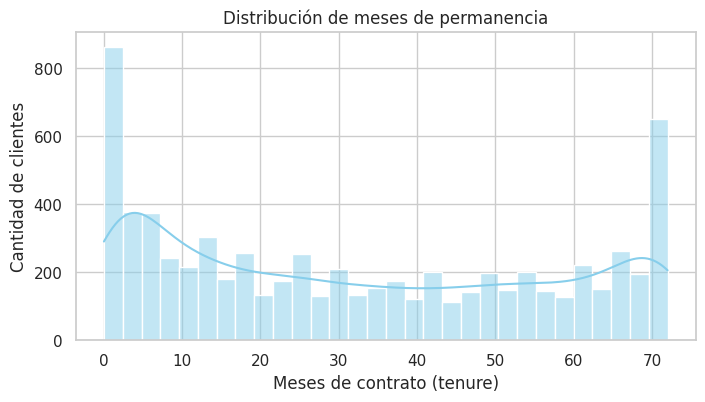

In [122]:
plt.figure(figsize=(8,4))
sns.histplot(df_telecom['customer.tenure'], bins=30, kde=True, color='skyblue')
plt.title("Distribuci√≥n de meses de permanencia")
plt.xlabel("Meses de contrato (tenure)")
plt.ylabel("Cantidad de clientes")
plt.show()

Distribuci√≥n de clientes seg√∫n los meses de permanencia
- Dos picos muy marcados:
  - En el mes 0: Hay una concentraci√≥n significativa de clientes con cero meses de permanencia. Esto puede reflejar registros err√≥neos o clientes que se dieron de baja justo despu√©s de contratar el servicio.
  - En el mes 72: Otro pico muy alto. Esto probablemente representa a clientes antiguos que llevan el m√°ximo tiempo posible en el sistema, posiblemente un contrato de 6 a√±os.
- Distribuci√≥n en el resto del eje:
  - Entre los meses 1 y 10 hay una ca√≠da r√°pida en la cantidad de clientes, lo que sugiere que muchos cancelan en los primeros meses.
  - A partir del mes 10 hasta cerca del 60, la cantidad de clientes se mantiene relativamente estable, pero baja.
  - La l√≠nea de densidad (KDE) muestra una forma de ‚ÄúU‚Äù invertida, reforzando que la mayor√≠a de los clientes est√°n concentrados en los extremos (0 o 72 meses), y son menos frecuentes los que se encuentran en la ‚Äúmitad del viaje‚Äù.





In [123]:
print('b. Edad y SeniorCitizen : Mayores de 65 a√±os podr√≠an tener una tasa de churn m√°s alta (posible falta de digitalizaci√≥n o soporte).')

df_telecom.groupby('customer.SeniorCitizen')['Churn'].value_counts(normalize=True).unstack()*100

b. Edad y SeniorCitizen : Mayores de 65 a√±os podr√≠an tener una tasa de churn m√°s alta (posible falta de digitalizaci√≥n o soporte).


Churn                          No        Yes
customer.SeniorCitizen                      
0                       76.393832  23.606168
1                       58.318739  41.681261

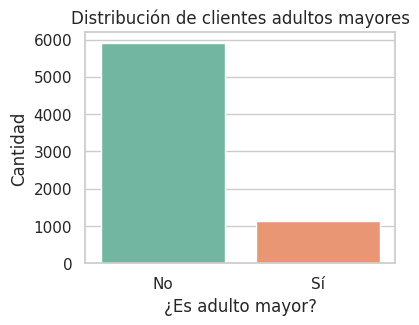

In [124]:
# Convertir 'SeniorCitizen' a categor√≠a para mejorar visualizaci√≥n
df_telecom['SeniorLabel'] = df_telecom['customer.SeniorCitizen'].map({0: 'No', 1: 'S√≠'})
sns.set(style="whitegrid")

# Gr√°fico 1: Distribuci√≥n de SeniorCitizen
plt.figure(figsize=(4,3))
sns.countplot(data=df_telecom, x='SeniorLabel', hue='SeniorLabel', palette='Set2', legend=False)

plt.title("Distribuci√≥n de clientes adultos mayores")
plt.xlabel("¬øEs adulto mayor?")
plt.ylabel("Cantidad")
plt.show()


In [125]:
print('c. Uso de servicios adicionales : Clientes sin servicios de valor agregado como seguridad en l√≠nea o soporte t√©cnico suelen irse m√°s.')
df_telecom.groupby('internet.OnlineSecurity')['Churn'].value_counts(normalize=True).unstack()*100


c. Uso de servicios adicionales : Clientes sin servicios de valor agregado como seguridad en l√≠nea o soporte t√©cnico suelen irse m√°s.


Churn                           No        Yes
internet.OnlineSecurity                      
No                       58.233276  41.766724
No internet service      92.595020   7.404980
Yes                      85.388806  14.611194

In [126]:
print('c. Uso de servicios adicionales : Clientes sin servicios de valor agregado como seguridad en l√≠nea o soporte t√©cnico suelen irse m√°s.')
df_telecom.groupby('internet.TechSupport')['Churn'].value_counts(normalize=True).unstack()*100


c. Uso de servicios adicionales : Clientes sin servicios de valor agregado como seguridad en l√≠nea o soporte t√©cnico suelen irse m√°s.


Churn                        No        Yes
internet.TechSupport                      
No                    58.364526  41.635474
No internet service   92.595020   7.404980
Yes                   84.833659  15.166341

In [127]:
print('d. M√©todo de pago y facturaci√≥n sin papel : Pagos electr√≥nicos o facturaci√≥n sin papel\n pueden estar relacionados con m√°s churn (posible falta de control del cliente sobre sus pagos).')
df_telecom.groupby('account.PaperlessBilling')['Churn'].value_counts(normalize=True).unstack()


d. M√©todo de pago y facturaci√≥n sin papel : Pagos electr√≥nicos o facturaci√≥n sin papel
 pueden estar relacionados con m√°s churn (posible falta de control del cliente sobre sus pagos).


Churn                           No       Yes
account.PaperlessBilling                    
No                        0.836699  0.163301
Yes                       0.664349  0.335651

In [128]:
#print('d. M√©todo de pago y facturaci√≥n sin papel : Pagos electr√≥nicos o facturaci√≥n sin papel pueden estar relacionados con m√°s churn (posible falta de control del cliente sobre sus pagos).')
df_telecom.groupby('account.PaymentMethod')['Churn'].value_counts(normalize=True).unstack()



Churn                            No       Yes
account.PaymentMethod                        
Bank transfer (automatic)  0.832902  0.167098
Credit card (automatic)    0.847569  0.152431
Electronic check           0.547146  0.452854
Mailed check               0.808933  0.191067

In [129]:
print('3. An√°lisis Multivariado (por ejemplo, con un modelo de √°rbol de decisi√≥n)')
print('Pod√©s usar un modelo para ver qu√© variables predicen mejor el churn:')
print('Este ranking te dice qu√© variables est√°n m√°s relacionadas con el churn.\n')
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

df_model = df_telecom.copy()
for col in df_model.select_dtypes(include='object'):
    df_model[col] = LabelEncoder().fit_transform(df_model[col])

X = df_model.drop(columns=['Churn', 'customerID'])
y = df_model['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_train, y_train)

importances = pd.Series(tree.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances.head(10)*100)


3. An√°lisis Multivariado (por ejemplo, con un modelo de √°rbol de decisi√≥n)
Pod√©s usar un modelo para ver qu√© variables predicen mejor el churn:
Este ranking te dice qu√© variables est√°n m√°s relacionadas con el churn.

account.Contract            53.732553
customer.tenure             15.067076
internet.TechSupport        12.044028
internet.InternetService     6.569885
account.Charges.Monthly      6.354533
account.Charges.Total        3.981799
account.PaperlessBilling     0.895420
internet.OnlineSecurity      0.542938
phone.PhoneService           0.413493
customer.gender              0.202663
dtype: float64


Conclusiones: los principales motivos de p√©rdida de clientes suelen ser:
* Contrato mensual (poca fidelizaci√≥n).
* No tener servicios de valor agregado (seguridad, soporte t√©cnico).
* Pagos electr√≥nicos autom√°ticos sin interacci√≥n humana.
* Cargos mensuales altos.
* Falta de dependientes o pareja (clientes solos tienden a irse m√°s f√°cilmente).

### Interpretaci√≥n mapa de calor de correlaciones

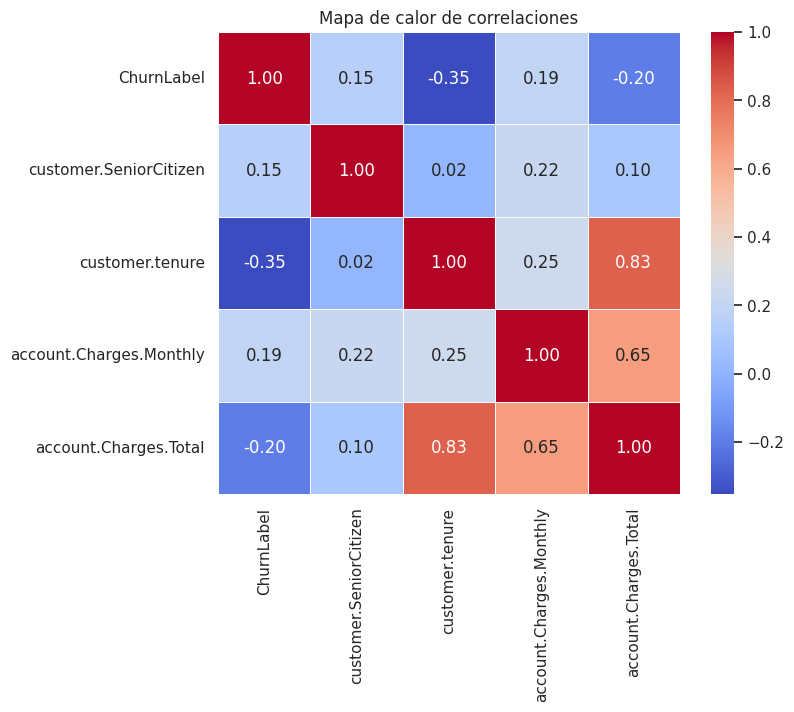

In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_telecom['ChurnLabel'] = df_telecom['Churn'].map({'Yes': 1, 'No': 0})

columnas_numericas = [
    'ChurnLabel',
    'customer.SeniorCitizen',
    'customer.tenure',
    'account.Charges.Monthly',
    'account.Charges.Total'
]

# Convertir columnas si es necesario
df_telecom[columnas_numericas] = df_telecom[columnas_numericas].apply(pd.to_numeric, errors='coerce')

# Calcular correlaciones
corr = df_telecom[columnas_numericas].corr()

# Graficar el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Mapa de calor de correlaciones")
plt.show()



- ChurnLabel:
  - Tiene una correlaci√≥n negativa moderada con customer.tenure (-0.35), lo que indica que los clientes con mayor tiempo de permanencia tienen menos probabilidad de cancelar.
  - Tiene una correlaci√≥n negativa m√°s leve con account.Charges.Total (-0.20), sugiriendo que los clientes que han gastado m√°s en total son menos propensos a hacer churn.
  - Tiene correlaci√≥n positiva baja con customer.SeniorCitizen (0.15), lo que significa que ser un cliente mayor tiene una leve influencia en la cancelaci√≥n.
  - Tambi√©n hay una correlaci√≥n positiva baja con account.Charges.Monthly (0.19), indicando que clientes con pagos mensuales m√°s altos podr√≠an ser un poco m√°s propensos a cancelar.
- customer.tenure (Antig√ºedad del cliente):
  - Tiene una correlaci√≥n positiva fuerte con account.Charges.Total (0.83). Esto tiene sentido: los clientes con m√°s meses de permanencia han gastado m√°s en total.
  - Tambi√©n tiene una correlaci√≥n positiva baja con account.Charges.Monthly (0.25), indicando que los clientes con m√°s tiempo suelen pagar montos mensuales ligeramente m√°s altos.
- account.Charges.Monthly (Pago mensual):
  - Tiene una correlaci√≥n moderada con account.Charges.Total (0.65), lo que muestra que los clientes con pagos mensuales altos tienden a haber gastado m√°s en total.




### An√°lisis de la distribuci√≥n de datos (Solo Ex Clientes)

In [131]:
print('Estadistica descriptiva de columnas n√∫mericas del data frame df_telecom_exclientes:\n')
df_telecom_exclientes.describe()


Estadistica descriptiva de columnas n√∫mericas del data frame df_telecom_exclientes:



customer.SeniorCitizen  customer.tenure  account.Charges.Monthly
count             1869.000000      1869.000000              1869.000000
mean                 0.254682        17.979133                74.441332
std                  0.435799        19.531123                24.666053
min                  0.000000         1.000000                18.850000
25%                  0.000000         2.000000                56.150000
50%                  0.000000        10.000000                79.650000
75%                  1.000000        29.000000                94.200000
max                  1.000000        72.000000               118.350000


#### Campo : customer.SeniorCitizen (cliente adulto mayor)
- Media (mean): 0.25 ‚Üí Solo el 25.5% de los clientes que se fueron son personas mayores.
- M√≠nimo (min): 0 ‚Üí Hay clientes j√≥venes en el conjunto.
- M√°ximo (max): 1 ‚Üí Algunos clientes mayores cancelaron el servicio.
- Distribuci√≥n (25%, 50%, 75%): La mayor√≠a de los ex-clientes no son mayores.

üí° Conclusi√≥n: Ser un cliente mayor no parece ser un factor determinante en la cancelaci√≥n.

#### Campo : customer.tenure (Tiempo como cliente)
- Media (mean): 17.98 ‚Üí Los clientes que cancelaron ten√≠an, en promedio, 18 meses de servicio.
- Desviaci√≥n est√°ndar (std): 19.53 ‚Üí Hay bastante variabilidad, algunos clientes duraron poco y otros mucho.
- M√≠nimo (min): 1 ‚Üí Hubo clientes que cancelaron en su primer mes.
- M√°ximo (max): 72 ‚Üí Algunos clientes estuvieron hasta 6 a√±os antes de cancelar.
- Distribuci√≥n (25%, 50%, 75%):
  - 25% de los clientes cancelaron en 2 meses o menos.
  - 50% cancelaron dentro de 10 meses.
  - 75% se mantuvieron hasta 29 meses antes de irse.

üí° Conclusi√≥n: La mayor√≠a de los clientes que cancelan son nuevos (menos de 10 meses de servicio). Los que permanecen por m√°s tiempo son m√°s leales.

#### Campo: account.Charges.Monthly (Pago Mensual)
- Media (mean): 74.44 ‚Üí En promedio, los clientes que se fueron pagaban 74.44 al mes.
- Desviaci√≥n est√°ndar (std): 24.67 ‚Üí Hay variabilidad en los montos mensuales.
- M√≠nimo (min): 18.85 ‚Üí Algunos clientes pagaban muy poco al mes.
- M√°ximo (max): 118.35 ‚Üí Otros pagaban bastante m√°s.
- Distribuci√≥n (25%, 50%, 75%):
- 25% pagaban menos de 56.15 al mes.
- 50% pagaban alrededor de 79.65.
- 75% pagaban hasta 94.20.

üí° Conclusi√≥n: Los clientes con pagos mensuales moderados o altos parecen m√°s propensos a cancelar. Podr√≠a indicar que precios altos afectan la decisi√≥n de permanencia.

#### Campo: account.Charges.Total (Total gastado)
- Media (mean): 1531.79 ‚Üí En promedio, los ex-clientes gastaron 1,531 en total.
- Desviaci√≥n est√°ndar (std): 1890.82 ‚Üí Gran variabilidad en el gasto total.
- M√≠nimo (min): 18.85 ‚Üí Algunos clientes apenas gastaron antes de cancelar.
- M√°ximo (max): 8684.80 ‚Üí Otros clientes gastaron hasta 8,684 antes de irse.
- Distribuci√≥n (25%, 50%, 75%):
- 25% gastaron menos de 134.50 (clientes nuevos).
- 50% gastaron alrededor de 703.55.
- 75% gastaron hasta 2,331.30.

üí° Conclusi√≥n: Muchos clientes que cancelan han gastado poco en total, lo que refuerza la idea de que los nuevos clientes tienen m√°s probabilidades de irse.






#üìÑInforme final

###Conclusiones
- Alta tasa de cancelaci√≥n temprana: Muchos clientes no superan los primeros meses. Puede indicar falta de satisfacci√≥n inicial, problemas de instalaci√≥n o mal servicio percibido.
- El tiempo de permanencia es un factor clave para la retenci√≥n de clientes, se recomienda promociones o campa√±as para fidelizar al cliente.
- Cliente con servicios adicionales como: OnlineSecurity, TechSupport o Backup, tienden a permanecer.
- El tipo de pago (Electronic check), suele estar m√°s asociado al abandono, se recomienda brindar opciones m√°s accesibles de pago.
- La edad no parece ser un gran predictor, las promociones o campa√±as no deben basarce en la edad del cliente.
- Los clientes que gastan poco en total son m√°s propensos a irse, se recomienda promociones de uso gratuito por meses de los servicios adicionales para que el cliente experimente las ventajas que brinda.

















